<h3>One-Dimensional Data</h3>
<p>Let's construct a histogram by following this logic:
    <ul>
        <li>A function that buckets individual points</li>
        <li>A function that counts the number of points at each bucket level, creating a dict-like object</li>
        <li>A function that plots the buckets on the x axis and the count corresponding to each bucket level on the y axis</li>
    </ul>
</p>

In [5]:
from __future__ import division
import math
from collections import Counter
from matplotlib import pyplot as plt

def bucketize(point, bucket_size):
    """floor the point to the next lower multiple of bucket_size"""
    return bucket_size * math.floor(point / bucket_size) # returns values [0,10) as 0, [10,20) as 10, etc.

def make_histogram(points, bucket_size):
    """buckets the points and counts how many in each bucket"""
    return Counter(bucketize(point, bucket_size) for point in points) # {bucket: # of points}

def plot_histogram(points, bucket_size, title=""):
    histogram = make_histogram(points, bucket_size)
    plt.bar(histogram.keys(), histogram.values(), width=bucket_size)
    plt.title(title)
    plt.show()


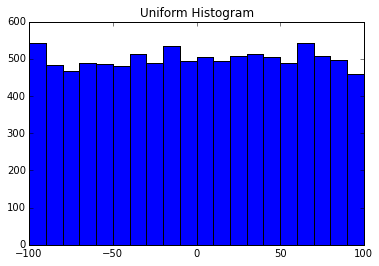

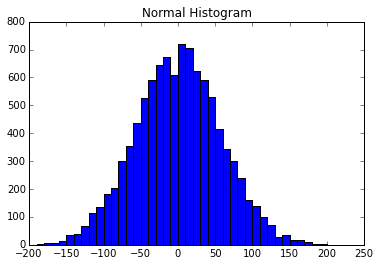

In [8]:
%matplotlib inline
import random
from scipy import stats

random.seed(0)

# a sample of values from a uniform between -100 and 100
uniform = [200 * random.random() - 100 for _ in range(10000)]

# a sample of values from a normal distribution with mean 0, standard deviation 57
normal = [57 * stats.norm.ppf(random.random())
         for _ in range(10000)]

plot_histogram(uniform, 10, "Uniform Histogram")

plot_histogram(normal, 10, "Normal Histogram")

In [14]:
import numpy as np

normal_arr = np.array(normal)
uniform_arr = np.array(uniform)

normal_std, uniform_std = np.std(normal_arr), np.std(uniform_arr)
print "Normal Sample Standard Deviation is %f and Uniform Sample Standard Deviation is %f" % (normal_std, uniform_std)

Normal Sample Standard Deviation is 57.388112 and Uniform Sample Standard Deviation is 57.553552


<h3>Two Dimensions</h3>

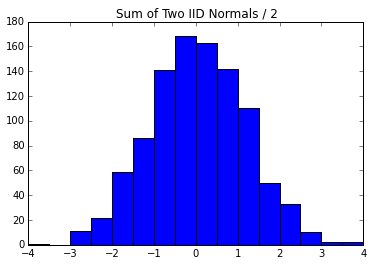

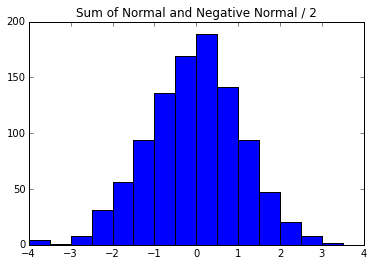

In [19]:
def random_normal():
    """returns a random draw from a standard normal distribution"""
    return stats.norm.ppf(random.random())

xs = [random_normal() for _ in range(1000)]
ys1 = [ x + random_normal() / 2 for x in xs] # as x increases, y1 increases, c.p. i.e. pos. correlation
ys2 = [-x + random_normal() / 2 for x in xs] # as x increases, y1 decreases, c.p. i.e. neg. correlation

plot_histogram(ys1, 0.5, "Sum of Two IID Normals / 2")
plot_histogram(ys2, 0.5, "Sum of Normal and Negative Normal / 2")

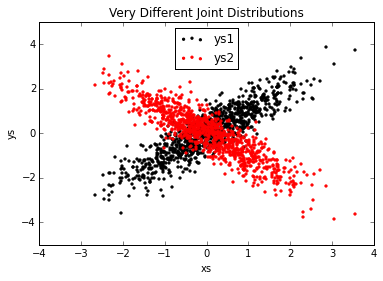

In [21]:
plt.scatter(xs, ys1, marker='.', color='black', label='ys1')
plt.scatter(xs, ys2, marker='.', color = 'red', label='ys2')
plt.xlabel('xs')
plt.ylabel('ys')
plt.legend(loc=9)
plt.title("Very Different Joint Distributions")
plt.show()

In [30]:
print math.floor(stats.stats.pearsonr(xs, ys1)[0] * (10 ** 2))/(10**2)
print math.floor(stats.stats.pearsonr(xs, ys2)[0] * (10 ** 2))/(10**2)

0.88
-0.89


<h3>Many Dimensions </h3>
<p>Imagine we had multidimensional data, e.g. 1000 individuals (rows) with 4 markers of health (col's)</p>

<h4>Correlation Matrix</h4>

In [54]:
def correlation_matrix(data):
    """returns the num_columns x num_columns matrix whose (i, j)th entry is the correlation
    between columns i and j of data"""
    
    _, num_columns = shape(data) # imagine the data is a list of lists, and each list represents an individual
    
    # get correlation of data in column i with data in column j
    def matrix_entry(i, j):
        return stats.stats.pearsonr(get_column(data, i), get_column(data, j))[0]
    
    return make_matrix(num_columns, num_columns, matrix_entry) # recall that matrix_entry f'n iterates through all i,j

<h4>Scatterplot Matrix</h4>

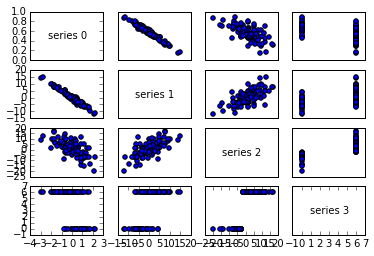

In [53]:
from linear_algebra import *

num_points = 100
    
def random_row():
    row = [None, None, None, None]
    row[0] = random_normal()
    row[1] = -5 * row[0] + random_normal()
    row[2] = row[0] + row[1] + 5 * random_normal()
    row[3] = 6 if row[2] > -2 else 0
    return row
random.seed(0)
data = [random_row()
        for _ in range(num_points)]
    
_, num_columns = shape(data)
fig, ax = plt.subplots(num_columns, num_columns) # we will just use the 2d-array of axes objects

# for each column, iterate through the columns and scatter them against each other assuming they are not the same col'n
for i in range(num_columns): 
    for j in range(num_columns):
        
        # scatter column_j on the x-axis vs column_i on the y-axis
        if i != j: ax[i][j].scatter(get_column(data, j), get_column(data, i))
        
        # unless i == j, in which case show the series name
        else: ax[i][j].annotate("series " + str(i), (0.5, 0.5), 
                                xycoords = 'axes fraction',
                               ha="center", va="center")
        
        # then hide axis labels except left and bottom charts
        if i < num_columns - 1: ax[i][j].xaxis.set_visible(False) # if row # is not last (bottom) row
        if j > 0: ax[i][j].yaxis.set_visible(False) # if col'n # is not first (left) col'n
        
# fix the bottom right and top left axis labels, which are wrong because their charts only have text in them
ax[-1][-1].set_xlim(ax[0][-1].get_xlim())
ax[0][1].set_ylim(ax[0][1].get_ylim())

plt.show()
